In [20]:
import pandas as pd

# Cargar el archivo CSV usando una raw string (nota la 'r' antes del path)
df = pd.read_csv(
    r'C:\Users\roman\OneDrive\Escritorio\Python\Diploma\Herramientas basicas para programación en Python\trabajo\public_transportation_statistics_by_zip_code-1-2.csv'
)

# Limpiar: quitar porcentajes negativos
df = df[df['public_transportation_pct'] >= 0]

# Crear columna de grupos de uso de transporte
df['grupo_transporte'] = df['public_transportation_pct'].apply(lambda x: 'Alto' if x > 10 else 'Bajo')

# Estimar ventas potenciales como ejemplo (10% de usuarios)
df['ventas_potenciales'] = df['public_transportation_population'] * 0.1

# Exportar a Excel
df.to_excel(
    r'C:\Users\roman\OneDrive\Escritorio\Python\Diploma\Herramientas basicas para programación en Python\trabajo\resultado_ventas.xlsx',
    index=False
)

# Ver los primeros resultados para confirmar
df.head()

,zip_code,public_transportation_pct,public_transportation_population,grupo_transporte,ventas_potenciales
0,1379,3.3,13,Bajo,1.3
1,1440,0.4,34,Bajo,3.4
2,1505,0.9,23,Bajo,2.3
3,1524,0.5,20,Bajo,2.0
4,1529,1.8,32,Bajo,3.2


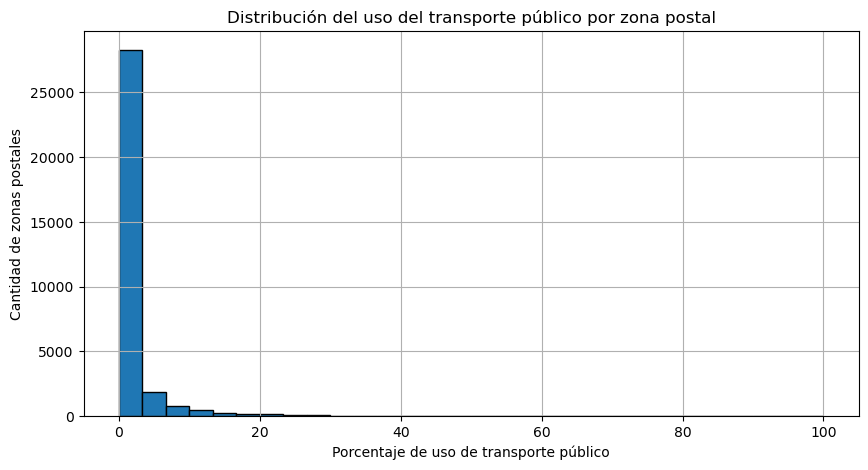

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df['public_transportation_pct'], bins=30, edgecolor='black')
plt.title('Distribución del uso del transporte público por zona postal')
plt.xlabel('Porcentaje de uso de transporte público')
plt.ylabel('Cantidad de zonas postales')
plt.grid(True)
plt.show()

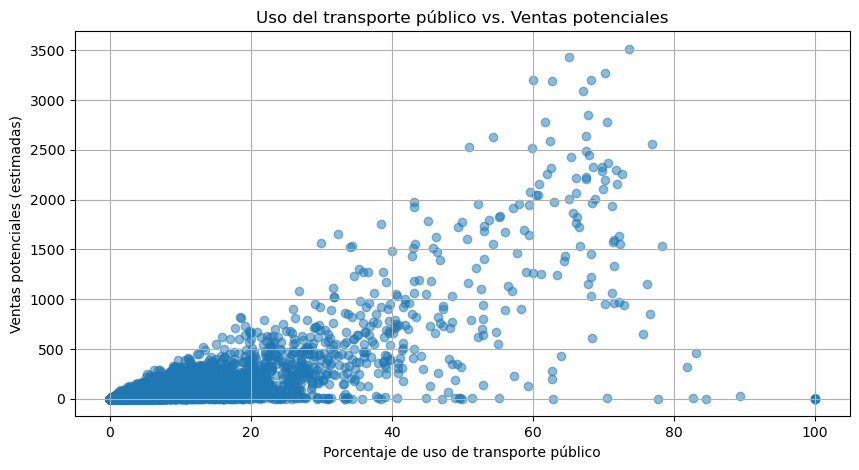

In [24]:
plt.figure(figsize=(10, 5))
plt.scatter(df['public_transportation_pct'], df['ventas_potenciales'], alpha=0.5)
plt.title('Uso del transporte público vs. Ventas potenciales')
plt.xlabel('Porcentaje de uso de transporte público')
plt.ylabel('Ventas potenciales (estimadas)')
plt.grid(True)
plt.show()

In [26]:
# Agrupar por el grupo de transporte y calcular el promedio de ventas
promedios = df.groupby('grupo_transporte')['ventas_potenciales'].mean().reset_index()

# Mostrar los promedios
print(promedios)

  grupo_transporte  ventas_potenciales
0             Alto          334.669281
1             Bajo            7.946801


In [30]:
promedios.to_excel('promedios_ventas_por_grupo.xlsx', index=False)

In [ ]:
import os
print(os.getcwd())